In [2]:
import pandas as pd
df = pd.DataFrame([["Edward Remirez","Male",28,"Bachelors"],
                   ["Arnav Sharma","Male",23,"Masters"],
                   ["Sophia Smith","Female",19,"High School"]], 
                  columns=['Name','Gender','Age','Degree'])

### nominal attribute
from sklearn.preprocessing import OneHotEncoder
encoder_for_gender = OneHotEncoder().fit(df[['Gender']])
gender_values = encoder_for_gender.transform(df[['Gender']])
gender_values.toarray() # sparse matrix
df[['Gender_F', 'Gender_M']] = gender_values.toarray()
df

### can order it in a sequence
from sklearn.preprocessing import OrdinalEncoder
encoder_for_education = OrdinalEncoder()
encoder_for_education.fit_transform(df[['Degree']])
encoder_for_education.categories_

encoder_for_education = OrdinalEncoder(categories = [['Masters',  'Bachelors','High School', 'Doctoral']])
df[['Degree_encoded']] = encoder_for_education.fit_transform(df[['Degree']])
df   

,Name,Gender,Age,Degree,Gender_F,Gender_M,Degree_encoded
0,Edward Remirez,Male,28,Bachelors,0.0,1.0,1.0
1,Arnav Sharma,Male,23,Masters,0.0,1.0,0.0
2,Sophia Smith,Female,19,High School,1.0,0.0,2.0


Dataset shape: (356, 9)

First 5 rows of the dataset:
   Feature_1  Feature_2  Feature_3  Feature_4  Feature_5  Feature_6  \
0   5.699326  -1.379835   1.279583  -2.101241   4.209894  -7.197867   
1  -0.797722  -2.391659  -2.122616   5.521819  -2.843448   3.657745   
2  -0.346293   0.067218  -2.028802  -1.168771   0.743966   3.259837   
3  -1.133528   0.156165  -3.540008  -0.237200   0.817640   5.238612   
4   1.117568  -1.806330  -1.561421   4.575870  -2.351170   1.206572   

   Feature_7  Feature_8  Target  
0  -2.344317  -3.322826       0  
1  -1.571055  -0.275959       0  
2   1.379075  -0.911148       1  
3   1.088293  -0.854501       1  
4  -0.242467   0.820391       1  

Feature Importance (Permutation Importance):
     Feature  Importance       Std
6  Feature_7    0.124648  0.013004
0  Feature_1    0.120775  0.011469
7  Feature_8    0.073592  0.011295
4  Feature_5    0.056690  0.010015
1  Feature_2    0.041901  0.013947
5  Feature_6    0.029577  0.010108
2  Feature_3    0.029225

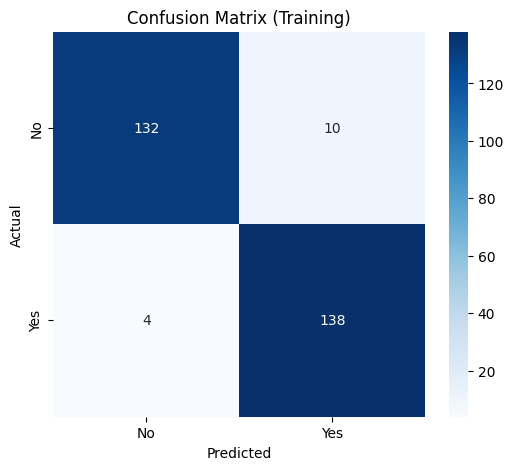


Training Accuracy: 0.9507
Training AUC: 0.9935

Test Accuracy: 0.9444
Test AUC: 0.9907


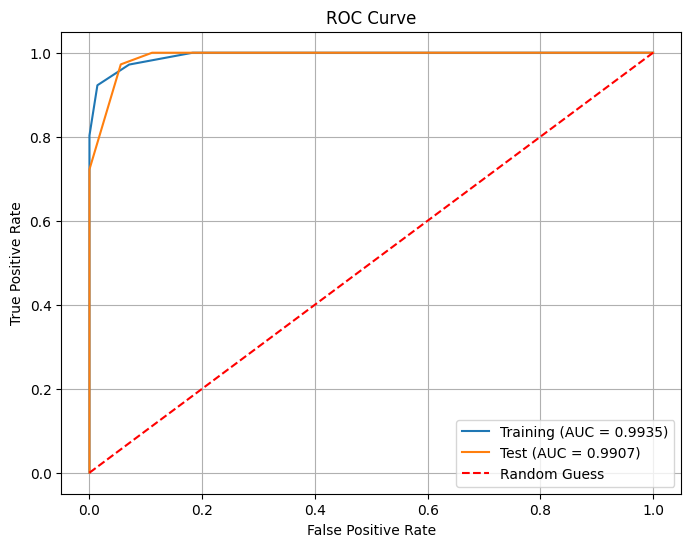


--- Testing different values of k ---
k=1, Accuracy=0.9444
k=2, Accuracy=0.9583
k=3, Accuracy=0.9444
k=4, Accuracy=0.9444
k=5, Accuracy=0.9444
k=6, Accuracy=0.9583
k=7, Accuracy=0.9583
k=8, Accuracy=0.9444
k=9, Accuracy=0.9444
k=10, Accuracy=0.9444


In [7]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn.inspection import permutation_importance

# Step 1: Generate a dataset with 356 rows and 8 features
X, y = make_classification(n_samples=356, n_features=8, 
                          n_informative=6, n_redundant=2, 
                          n_classes=2, random_state=42)

# Convert to DataFrame (optional, for better visualization)
df = pd.DataFrame(X, columns=[f'Feature_{i+1}' for i in range(8)])
df['Target'] = y

print("Dataset shape:", df.shape)
print("\nFirst 5 rows of the dataset:")
print(df.head())

# Step 2: Prepare features and target
X = df.iloc[:, :-1]  # First 8 columns (features)
y = df['Target']     # Last column (target)

# Step 3: Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Step 4: Standardize the features (important for KNN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 5: Train the KNN model
k = 5  # Number of neighbors
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train_scaled, y_train)

# Feature importance using permutation importance
perm_importance = permutation_importance(knn, X_train_scaled, y_train, n_repeats=10, random_state=42)
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': perm_importance.importances_mean,
    'Std': perm_importance.importances_std
})

# Sort by importance
significant_features = feature_importance.sort_values(by='Importance', ascending=False)

print("\nFeature Importance (Permutation Importance):")
print(significant_features)

# Step 6: Make predictions
y_pred = knn.predict(X_test_scaled)

# Step 7: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy:.4f}")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix (Training)
y_train_pred = knn.predict(X_train_scaled)
cm_train = confusion_matrix(y_train, y_train_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Training)')
plt.show()

# Training Accuracy and AUC
y_train_pred_prob = knn.predict_proba(X_train_scaled)[:, 1]
train_accuracy = accuracy_score(y_train, y_train_pred)
train_auc = roc_auc_score(y_train, y_train_pred_prob)
print(f"\nTraining Accuracy: {train_accuracy:.4f}")
print(f"Training AUC: {train_auc:.4f}")

# Evaluate on test data
y_test_pred_prob = knn.predict_proba(X_test_scaled)[:, 1]
y_test_pred = knn.predict(X_test_scaled)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_auc = roc_auc_score(y_test, y_test_pred_prob)
print(f"\nTest Accuracy: {test_accuracy:.4f}")
print(f"Test AUC: {test_auc:.4f}")

# ROC Curve (Training and Test)
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_pred_prob)
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_pred_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, label=f'Training (AUC = {train_auc:.4f})')
plt.plot(fpr_test, tpr_test, label=f'Test (AUC = {test_auc:.4f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()

# Optional: Try different values of k to find the best one
print("\n--- Testing different values of k ---")
k_range = range(1, 11)
scores = {}
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred_k = knn.predict(X_test_scaled)
    scores[k] = accuracy_score(y_test, y_pred_k)
    print(f"k={k}, Accuracy={scores[k]:.4f}")

Dataset shape: (356, 9)

First 5 rows of the dataset:
   Feature_1  Feature_2  Feature_3  Feature_4  Feature_5  Feature_6  \
0   5.699326  -1.379835   1.279583  -2.101241   4.209894  -7.197867   
1  -0.797722  -2.391659  -2.122616   5.521819  -2.843448   3.657745   
2  -0.346293   0.067218  -2.028802  -1.168771   0.743966   3.259837   
3  -1.133528   0.156165  -3.540008  -0.237200   0.817640   5.238612   
4   1.117568  -1.806330  -1.561421   4.575870  -2.351170   1.206572   

   Feature_7  Feature_8  Target  
0  -2.344317  -3.322826       0  
1  -1.571055  -0.275959       0  
2   1.379075  -0.911148       1  
3   1.088293  -0.854501       1  
4  -0.242467   0.820391       1  

Accuracy: 0.8611

Confusion Matrix:
[[31  5]
 [ 5 31]]

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.86      0.86        36
           1       0.86      0.86      0.86        36

    accuracy                           0.86        72
   macro avg     

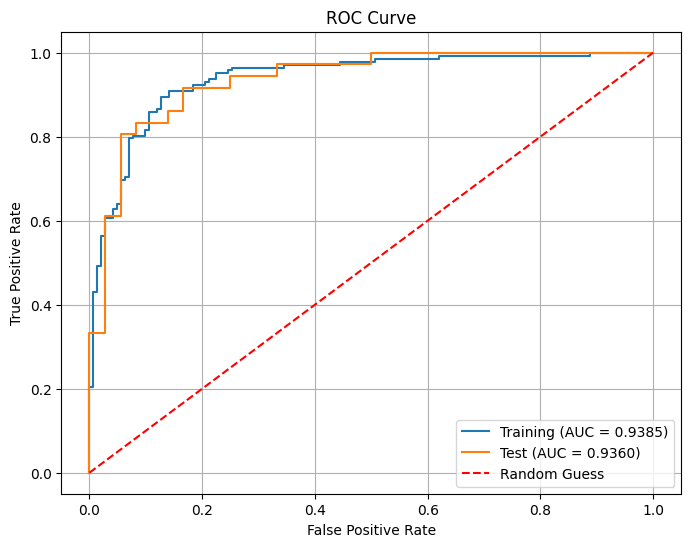

In [8]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score
from sklearn.datasets import make_classification

# Step 1: Generate a dataset with 356 rows and 8 features
# Binary classification (2 classes)
X, y = make_classification(
    n_samples=356,
    n_features=8,
    n_informative=6,
    n_redundant=2,
    n_classes=2,
    random_state=42
)

# Convert to DataFrame for better readability (optional)
df = pd.DataFrame(X, columns=[f'Feature_{i+1}' for i in range(8)])
df['Target'] = y

print("Dataset shape:", df.shape)
print("\nFirst 5 rows of the dataset:")
print(df.head())

# Step 2: Define features (X) and target (y)
X = df.iloc[:, :-1]  # First 8 columns (features)
y = df['Target']     # Last column (target)

# Step 3: Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Step 4: Initialize and train the Naive Bayes model
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Step 5: Make predictions
y_pred = nb_model.predict(X_test)

# Step 6: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy:.4f}")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Optional: Show predicted probabilities for the first few test samples
y_prob = nb_model.predict_proba(X_test)
print("\nPredicted probabilities (first 5 test samples):")
print(pd.DataFrame(y_prob, columns=['P(Class=0)', 'P(Class=1)']).head())

# Training Accuracy and AUC
y_train_pred = nb_model.predict(X_train)
y_train_pred_prob = nb_model.predict_proba(X_train)[:, 1]
train_accuracy = accuracy_score(y_train, y_train_pred)
train_auc = roc_auc_score(y_train, y_train_pred_prob)
print(f"\nTraining Accuracy: {train_accuracy:.4f}")
print(f"Training AUC: {train_auc:.4f}")

# Test Accuracy and AUC
y_test_pred = y_pred  # Already computed
y_test_pred_prob = nb_model.predict_proba(X_test)[:, 1]
test_accuracy = accuracy_score(y_test, y_test_pred)
test_auc = roc_auc_score(y_test, y_test_pred_prob)
print(f"\nTest Accuracy: {test_accuracy:.4f}")
print(f"Test AUC: {test_auc:.4f}")

# ROC Curve (Training and Test)
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_pred_prob)
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_pred_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, label=f'Training (AUC = {train_auc:.4f})')
plt.plot(fpr_test, tpr_test, label=f'Test (AUC = {test_auc:.4f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()

Dataset Shape: (10000, 9)

First few rows of the dataset:
   Age  MonthlyCharges  Tenure  ContractType  InternetService  PaymentMethod  \
0   45           44.65       1             0                1              0   
1   38           55.84      72             2                1              3   
2   47           47.08      38             1                2              3   
3   58           68.31      48             0                2              2   
4   37          100.92      28             2                2              3   

   NumComplaints  DataUsage ContractTypeLabel InternetServiceLabel  \
0              2      10.47    Month-to-month                  DSL   
1              0      20.95          Two year                  DSL   
2              2      19.00          One year          Fiber optic   
3              3      26.49    Month-to-month          Fiber optic   
4              0      47.44          Two year          Fiber optic   

  PaymentMethodLabel  Churn  
0   Electr

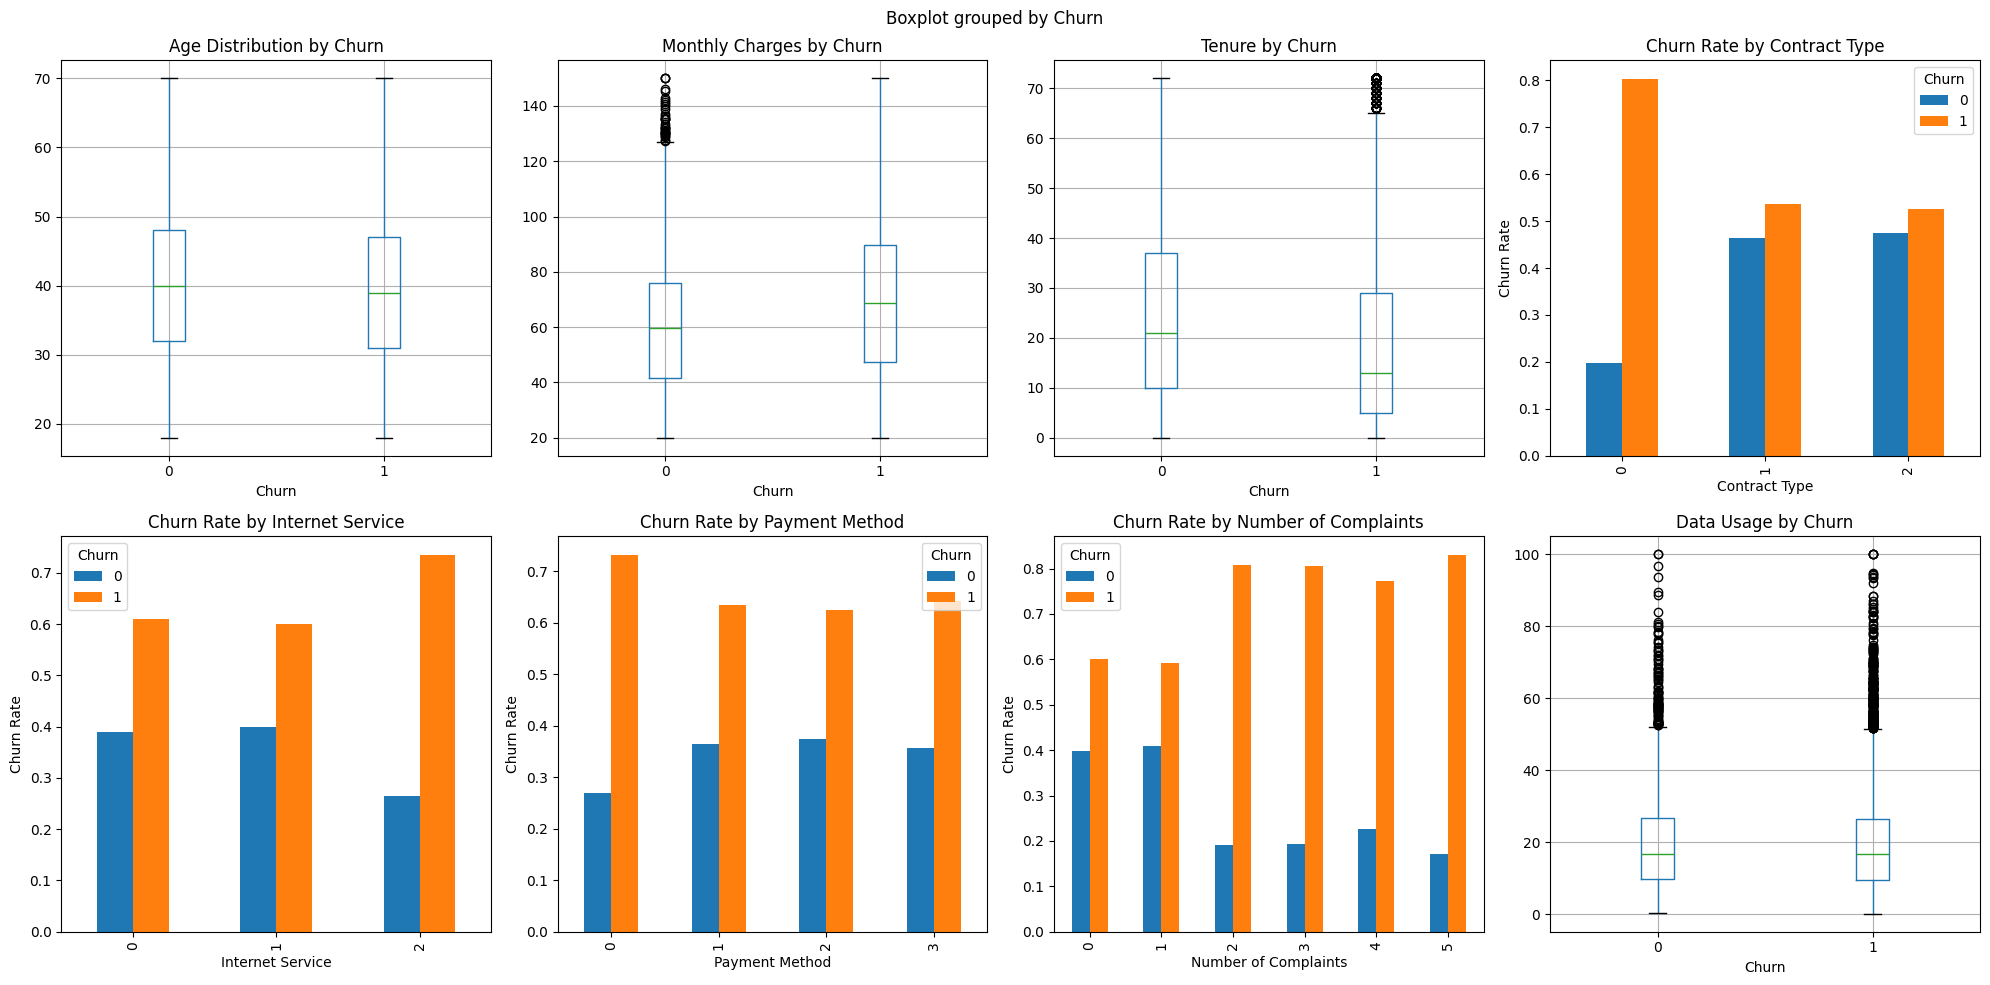


MODEL EVALUATION - NAIVE BAYES
Accuracy: 0.7160

Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.38      0.47       663
           1       0.74      0.88      0.81      1337

    accuracy                           0.72      2000
   macro avg       0.68      0.63      0.64      2000
weighted avg       0.70      0.72      0.69      2000



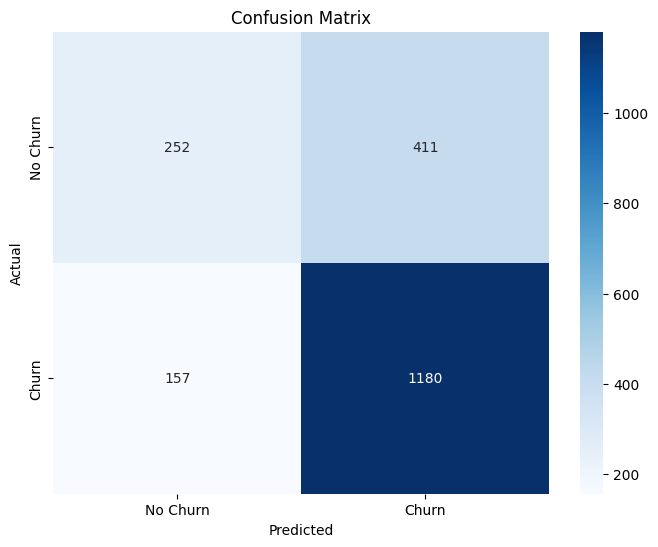

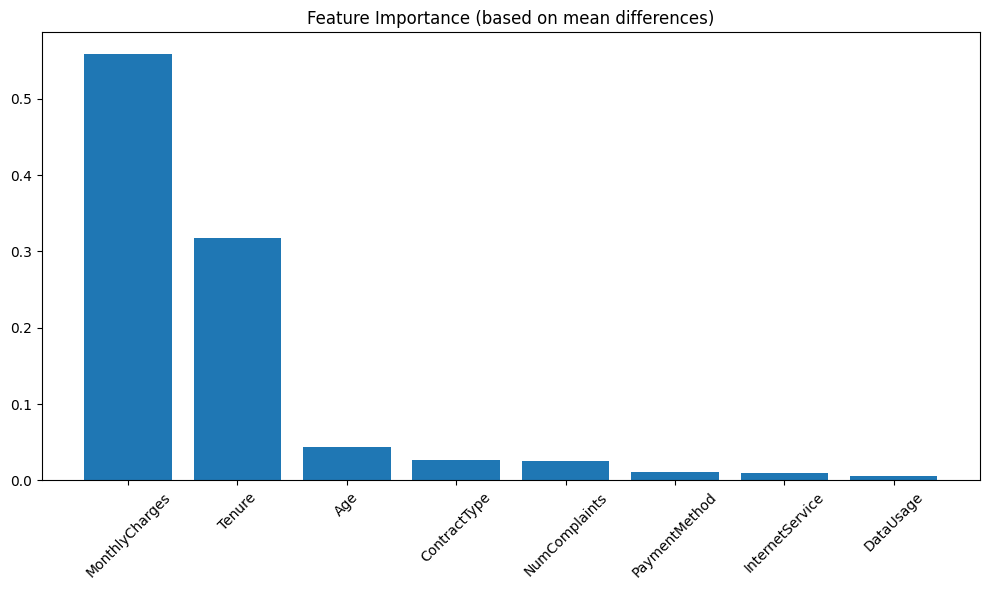


Feature Importance:
MonthlyCharges: 0.559
Tenure: 0.318
Age: 0.044
ContractType: 0.027
NumComplaints: 0.025
PaymentMethod: 0.012
InternetService: 0.010
DataUsage: 0.006

PREDICTION EXAMPLES
Sample Customer Predictions:
Customer 1: Churn (Probability: 0.980)
Customer 2: No Churn (Probability: 0.201)
Customer 3: Churn (Probability: 0.868)
Customer 4: No Churn (Probability: 0.239)

SUMMARY AND RECOMMENDATIONS
1. Dataset contains 10000 customers with 6684 churn cases (66.8%).
2. The Naive Bayes model achieved an accuracy of 71.6%.
3. Key factors influencing churn:
   1. MonthlyCharges
   2. Tenure
   3. Age

4. Recommendations:
   - Focus retention efforts on customers with monthlycharges characteristics
   - Develop special offers for customers with high tenure
   - Improve service for customers exhibiting age patterns


In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

# Set random seed for reproducibility
np.random.seed(42)

# Generate synthetic dataset with 10,000 rows and 8 features
n_samples = 10000

# Feature 1: Age (18-70)
age = np.random.normal(40, 12, n_samples)
age = np.clip(age, 18, 70)

# Feature 2: Monthly Charges (20-150)
monthly_charges = np.random.normal(65, 30, n_samples)
monthly_charges = np.clip(monthly_charges, 20, 150)

# Feature 3: Tenure (0-72 months)
tenure = np.random.exponential(24, n_samples)
tenure = np.clip(tenure, 0, 72)

# Feature 4: Contract Type (0: Month-to-month, 1: One year, 2: Two year)
contract_type = np.random.choice([0, 1, 2], n_samples, p=[0.5, 0.3, 0.2])

# Feature 5: Internet Service (0: No, 1: DSL, 2: Fiber optic)
internet_service = np.random.choice([0, 1, 2], n_samples, p=[0.1, 0.4, 0.5])

# Feature 6: Payment Method (0: Electronic check, 1: Mailed check, 2: Bank transfer, 3: Credit card)
payment_method = np.random.choice([0, 1, 2, 3], n_samples, p=[0.35, 0.25, 0.2, 0.2])

# Feature 7: Number of Complaints
num_complaints = np.random.poisson(1.2, n_samples)
num_complaints = np.clip(num_complaints, 0, 5)

# Feature 8: Data Usage (GB per month)
data_usage = np.random.gamma(2, 10, n_samples)
data_usage = np.clip(data_usage, 0, 100)

# Create the DataFrame
df = pd.DataFrame({
    'Age': age.astype(int),
    'MonthlyCharges': np.round(monthly_charges, 2),
    'Tenure': tenure.astype(int),
    'ContractType': contract_type,
    'InternetService': internet_service,
    'PaymentMethod': payment_method,
    'NumComplaints': num_complaints,
    'DataUsage': np.round(data_usage, 2)
})

# Create mapping for categorical variables for better readability
contract_map = {0: 'Month-to-month', 1: 'One year', 2: 'Two year'}
internet_map = {0: 'No', 1: 'DSL', 2: 'Fiber optic'}
payment_map = {0: 'Electronic check', 1: 'Mailed check', 2: 'Bank transfer', 3: 'Credit card'}

# Create a readable version of the dataframe
df_readable = df.copy()
df_readable['ContractTypeLabel'] = df_readable['ContractType'].map(contract_map)
df_readable['InternetServiceLabel'] = df_readable['InternetService'].map(internet_map)
df_readable['PaymentMethodLabel'] = df_readable['PaymentMethod'].map(payment_map)

# Generate the target variable (Churn) based on logical relationships with the features
# Customers are more likely to churn if:
# - They have month-to-month contracts
# - They have high monthly charges
# - They have low tenure
# - They have fiber optic internet (higher expectations)
# - They use electronic check payment
# - They have multiple complaints
# - They are younger

churn_prob = (
    0.1 + 
    0.3 * (df['ContractType'] == 0) +  # Month-to-month contracts more likely to churn
    0.2 * (df['MonthlyCharges'] > 80) +
    0.2 * (df['Tenure'] < 12) +
    0.15 * (df['InternetService'] == 2) +  # Fiber optic users more likely to churn
    0.15 * (df['PaymentMethod'] == 0) +  # Electronic check users more likely to churn
    0.1 * (df['Age'] < 30) +
    0.25 * (df['NumComplaints'] > 1) +
    0.1 * np.random.random(n_samples)  # Add some randomness
)

# Ensure probabilities are between 0 and 1
churn_prob = np.clip(churn_prob, 0, 1)

# Generate churn based on probabilities
churn = np.random.binomial(1, churn_prob, n_samples)

# Add churn to the dataframe
df['Churn'] = churn
df_readable['Churn'] = churn

# Display basic dataset information
print("Dataset Shape:", df.shape)
print("\nFirst few rows of the dataset:")
print(df_readable.head())

print("\nDataset Info:")
print(df.info())

print("\nChurn Distribution:")
print(df['Churn'].value_counts())
print(f"Churn Rate: {df['Churn'].mean():.2%}")

# Exploratory Data Analysis
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
fig.suptitle('Customer Churn Analysis - Feature Distributions', fontsize=16)

# Age vs Churn
df.boxplot(column='Age', by='Churn', ax=axes[0,0])
axes[0,0].set_title('Age Distribution by Churn')

# Monthly Charges vs Churn
df.boxplot(column='MonthlyCharges', by='Churn', ax=axes[0,1])
axes[0,1].set_title('Monthly Charges by Churn')

# Tenure vs Churn
df.boxplot(column='Tenure', by='Churn', ax=axes[0,2])
axes[0,2].set_title('Tenure by Churn')

# Contract Type vs Churn
contract_churn = pd.crosstab(df['ContractType'], df['Churn'], normalize='index')
contract_churn.plot(kind='bar', ax=axes[0,3], title='Churn Rate by Contract Type')
axes[0,3].set_xlabel('Contract Type')
axes[0,3].set_ylabel('Churn Rate')

# Internet Service vs Churn
internet_churn = pd.crosstab(df['InternetService'], df['Churn'], normalize='index')
internet_churn.plot(kind='bar', ax=axes[1,0], title='Churn Rate by Internet Service')
axes[1,0].set_xlabel('Internet Service')
axes[1,0].set_ylabel('Churn Rate')

# Payment Method vs Churn
payment_churn = pd.crosstab(df['PaymentMethod'], df['Churn'], normalize='index')
payment_churn.plot(kind='bar', ax=axes[1,1], title='Churn Rate by Payment Method')
axes[1,1].set_xlabel('Payment Method')
axes[1,1].set_ylabel('Churn Rate')

# Number of Complaints vs Churn
complaints_churn = pd.crosstab(df['NumComplaints'], df['Churn'], normalize='index')
complaints_churn.plot(kind='bar', ax=axes[1,2], title='Churn Rate by Number of Complaints')
axes[1,2].set_xlabel('Number of Complaints')
axes[1,2].set_ylabel('Churn Rate')

# Data Usage vs Churn
df.boxplot(column='DataUsage', by='Churn', ax=axes[1,3])
axes[1,3].set_title('Data Usage by Churn')

plt.tight_layout()
plt.show()

# Prepare data for modeling
X = df.drop('Churn', axis=1)
y = df['Churn']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Create and train the Naive Bayes model
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Make predictions
y_pred = nb_model.predict(X_test)
y_pred_proba = nb_model.predict_proba(X_test)[:, 1]

# Model Evaluation
print("\n" + "="*50)
print("MODEL EVALUATION - NAIVE BAYES")
print("="*50)

print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No Churn', 'Churn'], 
            yticklabels=['No Churn', 'Churn'])
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Feature Importance (using Naive Bayes feature log probabilities)
# Calculate the difference in means between churn and non-churn for each feature
feature_importance = []
for i, feature in enumerate(X.columns):
    churn_mean = X_train[y_train == 1][feature].mean()
    non_churn_mean = X_train[y_train == 0][feature].mean()
    diff = abs(churn_mean - non_churn_mean)
    feature_importance.append(diff)

# Normalize feature importance
feature_importance = np.array(feature_importance)
feature_importance = feature_importance / feature_importance.sum()

# Plot feature importance
plt.figure(figsize=(10, 6))
indices = np.argsort(feature_importance)[::-1]
plt.title('Feature Importance (based on mean differences)')
plt.bar(range(len(feature_importance)), feature_importance[indices])
plt.xticks(range(len(feature_importance)), [X.columns[i] for i in indices], rotation=45)
plt.tight_layout()
plt.show()

# Print feature importance
print("\nFeature Importance:")
for i in indices:
    print(f"{X.columns[i]}: {feature_importance[i]:.3f}")

# Predict churn probability for new customers
print("\n" + "="*50)
print("PREDICTION EXAMPLES")
print("="*50)

# Create a few sample customers
sample_customers = pd.DataFrame({
    'Age': [25, 45, 35, 60],
    'MonthlyCharges': [100, 50, 80, 60],
    'Tenure': [2, 36, 12, 48],
    'ContractType': [0, 2, 0, 1],
    'InternetService': [2, 1, 2, 0],
    'PaymentMethod': [0, 2, 0, 3],
    'NumComplaints': [3, 0, 1, 0],
    'DataUsage': [80, 40, 60, 10]
})

# Predict churn probability for sample customers
sample_pred_proba = nb_model.predict_proba(sample_customers)[:, 1]
sample_pred = nb_model.predict(sample_customers)

print("Sample Customer Predictions:")
for i in range(len(sample_customers)):
    status = "Churn" if sample_pred[i] == 1 else "No Churn"
    print(f"Customer {i+1}: {status} (Probability: {sample_pred_proba[i]:.3f})")

# Summary of findings
print("\n" + "="*50)
print("SUMMARY AND RECOMMENDATIONS")
print("="*50)
print(f"1. Dataset contains {len(df)} customers with {df['Churn'].sum()} churn cases ({df['Churn'].mean():.1%}).")
print(f"2. The Naive Bayes model achieved an accuracy of {accuracy_score(y_test, y_pred):.1%}.")
print(f"3. Key factors influencing churn:")
top_features = [X.columns[i] for i in indices[:3]]
for i, feature in enumerate(top_features, 1):
    print(f"   {i}. {feature}")

print(f"\n4. Recommendations:")
print(f"   - Focus retention efforts on customers with {top_features[0].lower()} characteristics")
print(f"   - Develop special offers for customers with high {top_features[1].lower()}")
print(f"   - Improve service for customers exhibiting {top_features[2].lower()} patterns") 